In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
train_df = pd.read_csv("./data/bank_app_reviews_train.csv")
train_df.head()

,리뷰일,평점,사용자리뷰,업체답변,은행명
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,NaN,하나
1,2025-02-17,1,Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...,안녕하세요. 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n어플의 ...,신한
2,2024-07-26,5,서비스가 통합되어 있어서 점점 사용빈도가 높아지네요.,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민
3,2024-09-01,1,카드 충천이 안됌,"안녕하세요. 전민구 님, 토스팀입니다. 남겨주신 내용만으로는 겪고계신 불편사항의 자...",토스
4,2023-11-13,1,알뜰폰 인증이 안돼요.....,"안녕하세요 헤이모두들안녕님, 우리은행입니다. 먼저 이용에 불편을 드려 매우 죄송합니...",우리


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22246 entries, 0 to 22245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰일     22246 non-null  object
 1   평점      22246 non-null  int64 
 2   사용자리뷰   22246 non-null  object
 3   업체답변    19141 non-null  object
 4   은행명     22246 non-null  object
dtypes: int64(1), object(4)
memory usage: 869.1+ KB


In [4]:
test_df = pd.read_csv("./data/bank_app_reviews_test.csv")
test_df.head()

,리뷰일,평점,사용자리뷰,업체답변,은행명
0,2024-02-08,5,고경민계장님감사해요,"안녕하세요 최순녀 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 서비스...",우리
1,2023-07-24,5,저축목표피드 새로 생긴거 너무좋은데 분명 카테고리를 저축으로 했는데 왜 인식이 안되...,"신아​ 님, 안녕하세요? 뱅크샐러드 고객감동팀​입니다. 소중한 시간내어 고객센터에 ...",뱅크샐러드
2,2023-09-25,1,아니 이딴걸 편리하게 사용하는앱이라고 쳐만들엇나 이렇게 불편하게만든건 일부러그런거에...,안녕하세요. 우리은행입니다. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리
3,2024-02-15,3,몇 년째 만족하며 사용중이라 조금식 개선되어거는 모습에 만족하며 사용중입니다. 하지...,안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드에 KB pay를 연결해 모든 자...,뱅크샐러드
4,2023-06-19,5,스타뱅킹을 사용 하고나서부터 편안해서 좋아요,"한송림 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 앞...",국민


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534 entries, 0 to 9533
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰일     9534 non-null   object
 1   평점      9534 non-null   int64 
 2   사용자리뷰   9534 non-null   object
 3   업체답변    8221 non-null   object
 4   은행명     9534 non-null   object
dtypes: int64(1), object(4)
memory usage: 372.5+ KB


In [6]:
train_df['평점']. value_counts()

평점
5    11416
1     6751
4     1824
3     1308
2      947
Name: count, dtype: int64

<Axes: xlabel='평점'>

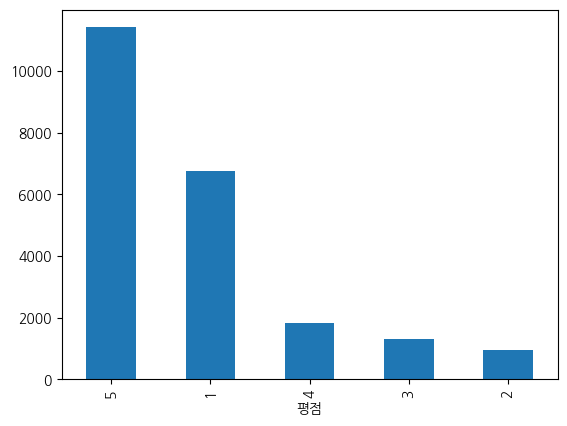

In [7]:
train_df['평점']. value_counts().plot(kind='bar')

In [8]:
train_df[train_df['평점'] == 4]['사용자리뷰'].head(60)

11                                                   좋아요
14                                                    좋음
27     Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨...
30     이전거보다 메뉴가 많아진건지 내가 사용하는게 걷기가 숨겨져 불편.확인 할때마다 일상...
38              보상을 얻기위해 광고를 보는건 상관없는데 광고 좀 가려 받으면 안되나요?
69     오늘 토스 재가입 후 저도 모르는 사이 토스페이가입되었네요. 가입 금액(5,900원...
75                                     빠르고 정확함 이용을 권장합니다
82                                    아직까지 잘 사용하고 있습니다 ?
91     지난 달부터 갑자기 홈->앞으로 낼 카드값 부분에 특정 카드사 한곳만 뜹니다ㅠ 분명...
97                                                    만족
98                                                    좋음
106    가상계좌가 브랜드콘 같은걸 살때는 아무 불편함이없는데 온라인으로 결제를할때 제계좌명...
107                                  토스아이디를 제발 다시 만들어주세요
118                                       금액이조금적어서 아쉬었어요
130                 해외(영국)현지번호를 쓰다보니, 인증번호를 받을수가 없습니다. ㅠ
145                     항상 먼저 고객상황을 고려해서 정보을 알려주어 감사감사^^
151     역대 은행앱 중 가장 만족. 허나 이벤트를 하려고 버튼을 누르면 오류가 생겼다며 안됨.
153    소비 관리하는 데 아주 유용하게 쓰고 있습니

In [9]:
train_df[train_df['평점'] == 3]['사용자리뷰'].head(60)

6                           고양이키우기 쿠폰 유효기간 6일. 넘 한거 아닌가요?
18      배터리가 빨리 줄어요..서비스센터 가면 토스앱이 배터리 사용이 많다고 하네요.. 방...
32                                입출금목록에서 터치해서메모입력하던게안되네요
39                             앱 켤때 70%는 다시 켜야됨. 캐시 남아있다고
89      제일 큰 문제중 하나는 혜택으로 알림설정을 유도하면서 알림이 제대로 동작 안합니다....
132     포인트통의 포인트를 포인트리로 전환하려는데 보내기가 안되네요 오류 개선 좀 부탁드려...
176     은행.신한카드 잘 쓰고 있는데 이거 왜? 출시? 수퍼 Opt 재발행하고,은행쓸려 했...
177                                   토스 요즘 쫌 짜증난다 맨날 버그야
184      데이터로 하나원큐 들어가려는데 너무 오래 걸립니다... 옛날에는 안그랬는데 버그인가요?
197                 할부금 완납한거는 왜 반영이 안돼서 계속 할부금액으로 계속 잡히나요
209     무슨 점검을 밥 먹듯이 하세요.. 할꺼면 새벽 2시 이후로 해주세요 타이밍 진짜.....
253     쇼핑, 주식 메뉴가 삼성 덱스에선 안나옵니다. 다른앱은 이런게 없는데 토스만 그렇군...
266                                  만족합니다. 간단하고 빠르고~~~~~
305     토스를 사용하고 싶어도 비번을 틀려서 못 사용중 ㅠㅠㅠ 이거 어떻하나요? 저 번호도...
352     홈화면에서 노란색 이체 버튼 눌렀을때 최근계좌에 입금금액이랑 입금날짜가 같이 떴었는...
357     10월4일 부터 푸시알림(?)이 이상네요. 며칠 전 앱 업데이를 많이 한 것 같은데...
362     다 좋은데 요즘 고양이??키우기 100%채운 후 새 고양이로 넘어갈때 화면 정지되고...
389     토스 요즘 

In [10]:
train_df['긍정'] = train_df['평점'].apply(lambda x: 1 if x in [5, 4] else 0)
train_df

,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,NaN,하나,1
1,2025-02-17,1,Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...,안녕하세요. 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n어플의 ...,신한,0
2,2024-07-26,5,서비스가 통합되어 있어서 점점 사용빈도가 높아지네요.,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민,1
3,2024-09-01,1,카드 충천이 안됌,"안녕하세요. 전민구 님, 토스팀입니다. 남겨주신 내용만으로는 겪고계신 불편사항의 자...",토스,0
4,2023-11-13,1,알뜰폰 인증이 안돼요.....,"안녕하세요 헤이모두들안녕님, 우리은행입니다. 먼저 이용에 불편을 드려 매우 죄송합니...",우리,0
...,...,...,...,...,...,...
22241,2025-03-12,3,어플 시작오류가 가끔 나네요.,안녕하세요 푸딩 고객님. 우리은행 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 2...,우리,0
22242,2025-01-09,1,업데이트 후에 계좌이체하는 게 자주 튕겨요,안녕하세요 일월구일 고객님. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리,0
22243,2023-07-07,5,굳굳굳,"Seung Woo Kim 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로...",국민,1
22244,2024-10-10,5,오래시간 같이한 나의은행 든든합니다.,안녕하세요 lee jeong seon (isate) 고객님. 칭찬 진심으로 감사드리...,우리,1


In [11]:
test_df['긍정'] = test_df['평점'].apply(lambda x: 1 if x in [5, 4] else 0)
test_df

,리뷰일,평점,사용자리뷰,업체답변,은행명,긍정
0,2024-02-08,5,고경민계장님감사해요,"안녕하세요 최순녀 고객님. 칭찬 진심으로 감사드리며, 더욱 편리하고 안정적인 서비스...",우리,1
1,2023-07-24,5,저축목표피드 새로 생긴거 너무좋은데 분명 카테고리를 저축으로 했는데 왜 인식이 안되...,"신아​ 님, 안녕하세요? 뱅크샐러드 고객감동팀​입니다. 소중한 시간내어 고객센터에 ...",뱅크샐러드,1
2,2023-09-25,1,아니 이딴걸 편리하게 사용하는앱이라고 쳐만들엇나 이렇게 불편하게만든건 일부러그런거에...,안녕하세요. 우리은행입니다. 먼저 우리WON뱅킹 이용에 불편을 드려 죄송합니다. 보...,우리,0
3,2024-02-15,3,몇 년째 만족하며 사용중이라 조금식 개선되어거는 모습에 만족하며 사용중입니다. 하지...,안녕하세요? 뱅크샐러드 고객감동팀입니다. 뱅크샐러드에 KB pay를 연결해 모든 자...,뱅크샐러드,0
4,2023-06-19,5,스타뱅킹을 사용 하고나서부터 편안해서 좋아요,"한송림 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 앞...",국민,1
...,...,...,...,...,...,...
9529,2025-04-05,1,만보기 이벤트는 실망스러워요. 후기 말투 다 똑같고 사기 맞죠? 양심이 참... 정...,"안녕하세요. 송송님, 토스팀입니다. 만족스러운 서비스를 제공하기 위해 노력하였으나,...",토스,0
9530,2023-05-17,5,기능이 많아 다 사용해보진 못 했지만 대체적으로 편한거 같아요,이강욱 고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 고객...,국민,1
9531,2023-07-05,5,편리하네요.,"농사꾼 고객님, 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. 앞...",국민,1
9532,2024-12-20,5,사용하기 편리해요,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민,1


In [12]:
train_df['은행명'].value_counts()

은행명
국민       8863
토스       6201
우리       2969
하나       1932
신한       1764
뱅크샐러드     517
Name: count, dtype: int64

# 변수를 자동으로 생성하면서 긍정부정 데이터프레임 만들기
* globals()[변수명]

In [13]:
bank_en_list = ['hana', 'shinhan', 'kb', 'toss', 'woori', 'b_salad']

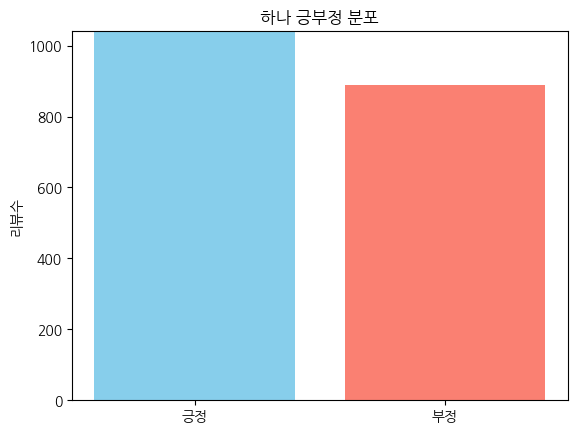


1042 890


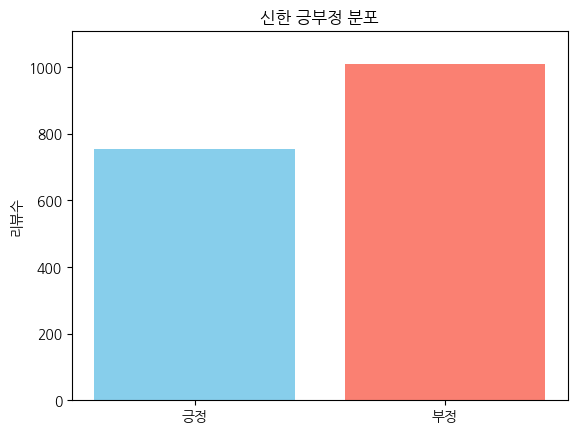


755 1009


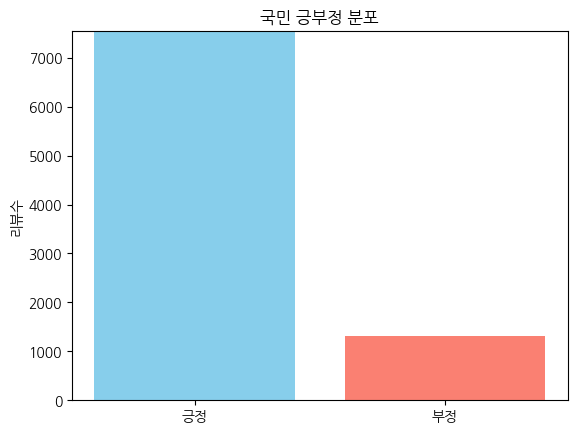


7553 1310


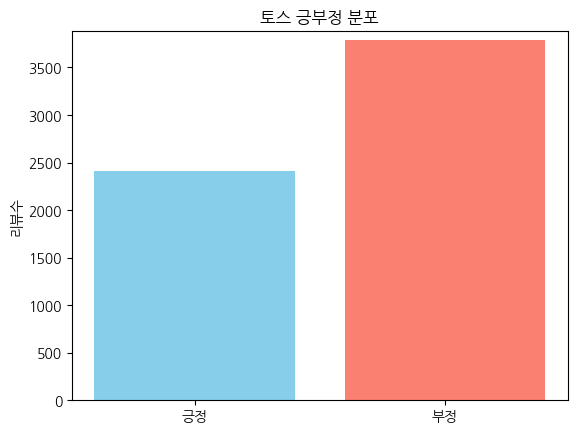


2415 3786


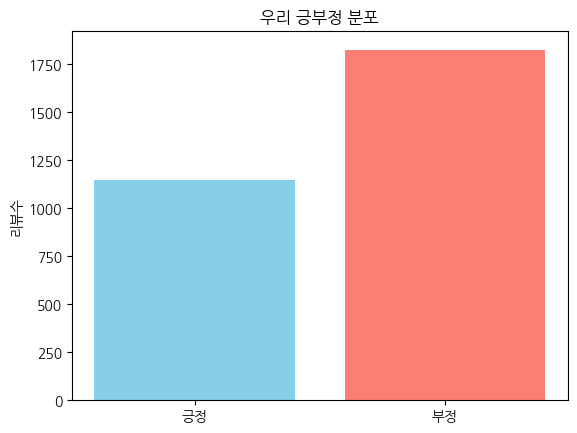


1146 1823


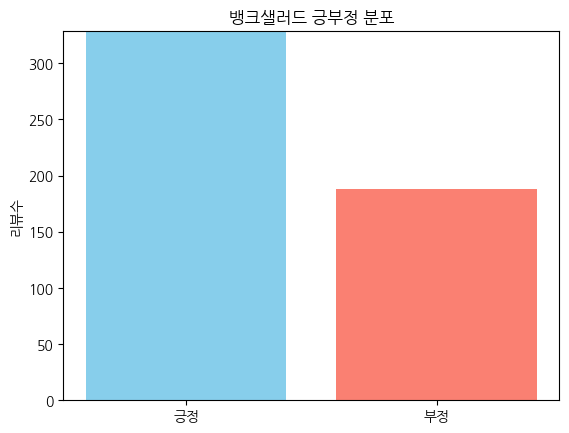


329 188


In [14]:
pos_neg_list = []
for bank, bank_eng in zip(train_df['은행명'].unique(), bank_en_list):
    # 은행별 긍정 부정 리뷰를 필터링
    pos = train_df[(train_df['은행명'] == bank) & (train_df['긍정'] == 1)]
    neg = train_df[(train_df['은행명'] == bank) & (train_df['긍정'] == 0)]
    # 전역변수를 자동 생성해서 저장
    globals()[f"{bank_eng}_pos"] = pos
    globals()[f"{bank_eng}_neg"] = neg
    pos_neg_list.append(f"{bank_eng}_pos")
    pos_neg_list.append(f"{bank_eng}_neg")
    
    # 시각화
    plt.bar(['긍정', '부정'], [pos.shape[0], neg.shape[0]], color=['skyblue', 'salmon'])
    plt.title(f"{bank} 긍부정 분포")
    plt.ylabel("리뷰수")
    plt.ylim(0, max(pos.shape[0], neg.shape[0] + 100))
    plt.show()
    print()
    print(pos.shape[0], neg.shape[0])
    

In [15]:
pos_neg_list

['hana_pos',
 'hana_neg',
 'shinhan_pos',
 'shinhan_neg',
 'kb_pos',
 'kb_neg',
 'toss_pos',
 'toss_neg',
 'woori_pos',
 'woori_neg',
 'b_salad_pos',
 'b_salad_neg']

In [16]:
# for bank in pos_neg_list:
#     display(globals()[bank])

모든 데이터 프레임에서 특수문자 제거하기

In [17]:
import re
def text_clean(x):
    pattern = r'[가-힣0-9a-zA-Z]+'
    matches = re.findall(pattern, x)
    matches = " ".join(matches)
    return matches

In [18]:
for bank in pos_neg_list:
    globals()[bank]['사용자리뷰'] = globals()[bank]['사용자리뷰'].apply(text_clean)

C:\Users\Admin\AppData\Local\Temp\ipykernel_28216\295539541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[bank]['사용자리뷰'] = globals()[bank]['사용자리뷰'].apply(text_clean)


In [19]:
hana_pos['사용자리뷰']

0                  엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 저도 쓰고있음
27       Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨...
58                 뱅킹 잘 이용하고 있어요 항상친절 하게 설명 해 주셔서 감사 수고하세요
59                                                  잘쓰고잇어용
66                                                   감사합니다
                               ...                        
22120                         입 출 현황을 확인할 수 있어 매우 편리하고 좋아요
22165                                          최고입니다 감사합니다
22196                                                감사합니다
22202                                             간편하고 좋네요
22214                                                  좋아요
Name: 사용자리뷰, Length: 1042, dtype: object

# 은행별 긍부정 리뷰 워드클라우드 만들기

In [36]:
# !pip install wordcloud

In [37]:
from wordcloud import WordCloud
from konlpy.tag import Mecab
mecab= Mecab()

In [38]:
pos_neg_list

['hana_pos',
 'hana_neg',
 'shinhan_pos',
 'shinhan_neg',
 'kb_pos',
 'kb_neg',
 'toss_pos',
 'toss_neg',
 'woori_pos',
 'woori_neg',
 'b_salad_pos',
 'b_salad_neg']

In [51]:
hana_pos['사용자리뷰']

0                  엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 저도 쓰고있음
27       Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨...
58                 뱅킹 잘 이용하고 있어요 항상친절 하게 설명 해 주셔서 감사 수고하세요
59                                                  잘쓰고잇어용
66                                                   감사합니다
                               ...                        
22120                         입 출 현황을 확인할 수 있어 매우 편리하고 좋아요
22165                                          최고입니다 감사합니다
22196                                                감사합니다
22202                                             간편하고 좋네요
22214                                                  좋아요
Name: 사용자리뷰, Length: 1042, dtype: object

In [54]:
hana_pos.shape

(1042, 6)

In [53]:
# 사용자리뷰 커럼을 Series에서 list 변경해서 담고
# 다시 join으로 1개의 문자열로 변환
text_data = hana_pos['사용자리뷰'].astype(str).tolist()
full_text = " ".join(text_data)

# 불용어 세트 생성
stopwords = set(['은행', '어플', '뱅킹', '하나', '앱', 'toss'])

# 명사 추출
nouns = mecab.nouns(full_text)
filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

# 빈도수 집계
from collection import Counter
word_freq = Counter(fillered)

# 워드클라우드 생성